# GPyOpt: dealing with cost fuctions

### Written by Javier Gonzalez, University of Sheffield.

## Reference Manual index

*Last updated Friday, 11 March 2016.*

GPyOpt allows to consider function evaluation costs in the optimization.

In [1]:
%pylab inline  
import GPyOpt

Populating the interactive namespace from numpy and matplotlib


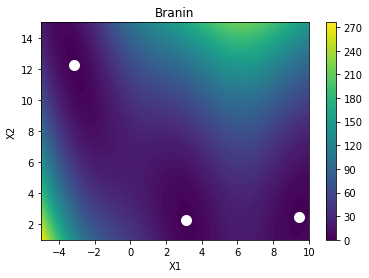

In [2]:
# --- Objective function
objective_true  = GPyOpt.objective_examples.experiments2d.branin()                 # true function
objective_noisy = GPyOpt.objective_examples.experiments2d.branin(sd = 0.1)         # noisy version
bounds = objective_noisy.bounds     
objective_true.plot()

In [3]:
domain = [{'name': 'var_1', 'type': 'continuous', 'domain': bounds[0]}, ## use default bounds
          {'name': 'var_2', 'type': 'continuous', 'domain': bounds[1]}]

In [4]:
def mycost(x):
    cost_f  = np.atleast_2d(.1*x[:,0]**2 +.1*x[:,1]**2).T
    cost_df = np.array([0.2*x[:,0],0.2*x[:,1]]).T
    return cost_f, cost_df

In [5]:
# plot the cost fucntion
grid = 400
bounds = objective_true.bounds
X1 = np.linspace(bounds[0][0], bounds[0][1], grid)
X2 = np.linspace(bounds[1][0], bounds[1][1], grid)
x1, x2 = np.meshgrid(X1, X2)
X = np.hstack((x1.reshape(grid*grid,1),x2.reshape(grid*grid,1)))

cost_X, _ = mycost(X)

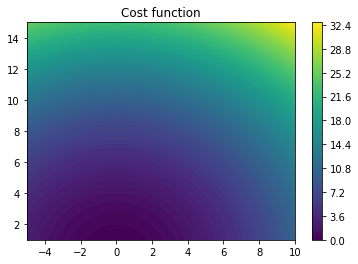

In [6]:
# Feasible region
plt.contourf(X1, X2, cost_X.reshape(grid,grid),100, alpha=1,origin ='lower')
plt.title('Cost function')
plt.colorbar()

In [7]:
GPyOpt.methods.BayesianOptimization?

In [8]:
from numpy.random import seed
seed(123)
BO = GPyOpt.methods.BayesianOptimization(f=objective_noisy.f,  
                                            domain = domain, 
                                            initial_design_numdata = 5,
                                            acquisition_type = 'EI',              
                                            normalize_Y = True,
                                            exact_feval = False,
                                            acquisition_jitter = 0.05)  

In [9]:
seed(123)
BO_cost = GPyOpt.methods.BayesianOptimization(f=objective_noisy.f,  
                                            cost_withGradients = mycost,
                                            initial_design_numdata =5,
                                            domain = domain,                  
                                            acquisition_type = 'EI',              
                                            normalize_Y = True,
                                            exact_feval = False,
                                            acquisition_jitter = 0.05)    

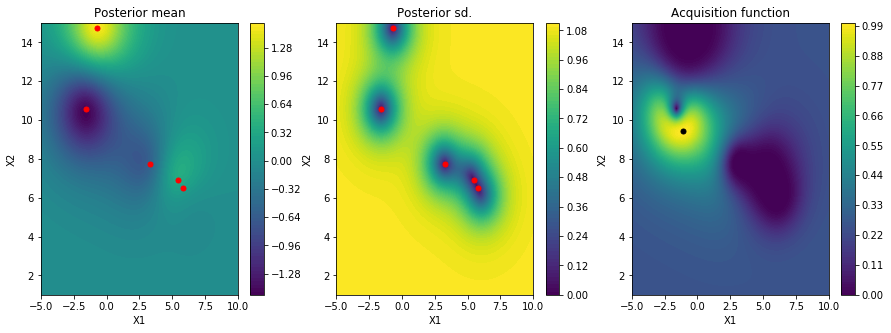

In [10]:
BO.plot_acquisition()

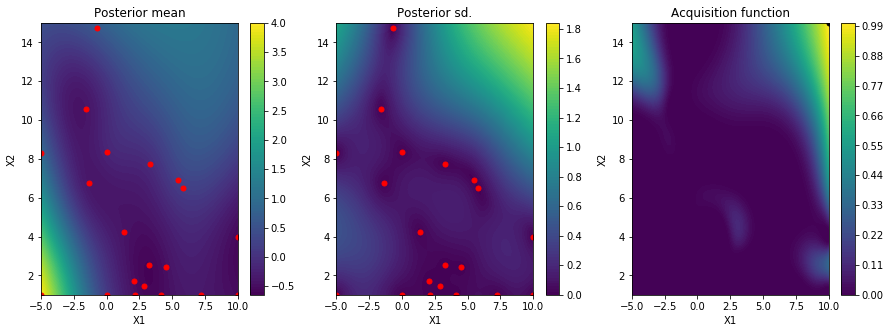

In [11]:
BO_cost.run_optimization(15)
BO_cost.plot_acquisition()

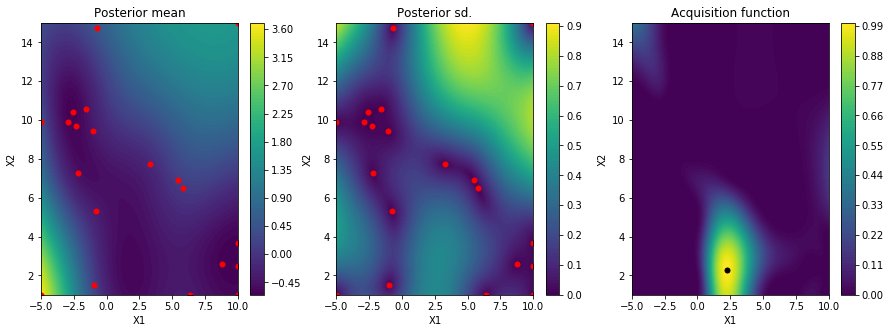

In [12]:
BO.run_optimization(15)
BO.plot_acquisition()